In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uci_heart_data = pd.read_csv('heart_disease_uci.csv')

In [3]:
uci_heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
uci_heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

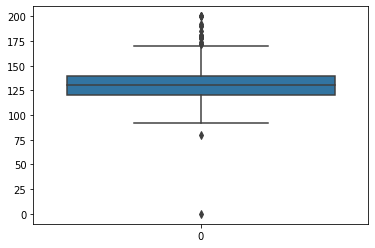

In [5]:
sns.boxplot(data=uci_heart_data['trestbps'])

In [6]:
# Use the median to fill in the na values since the data is skewed
uci_heart_data['trestbps'].fillna(uci_heart_data['trestbps'].median(), inplace=True)

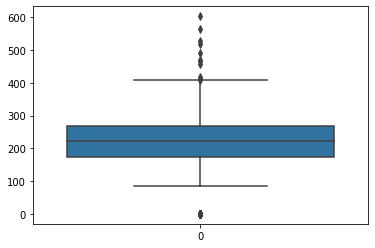

In [7]:
sns.boxplot(data=uci_heart_data['chol'])

In [8]:
# Use the median to fill in na values since the data is skewed
uci_heart_data['chol'].fillna(uci_heart_data['chol'].median(), inplace=True)

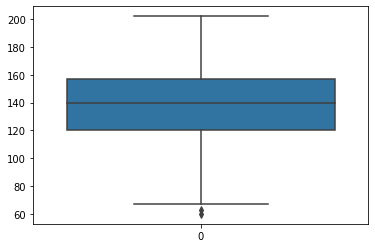

In [9]:
sns.boxplot(data=uci_heart_data['thalch'])

In [10]:
# Use the mean to fill in na values since the data is not skewed
uci_heart_data['thalch'].fillna(uci_heart_data['thalch'].mean(), inplace=True)

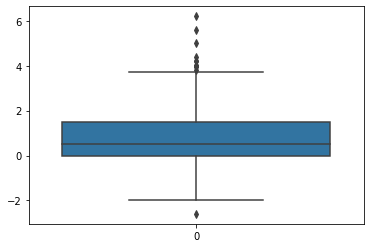

In [11]:
sns.boxplot(data=uci_heart_data['oldpeak'])

In [12]:
# Use the median to fill in na values since the data is skewed
uci_heart_data['oldpeak'].fillna(uci_heart_data['oldpeak'].median(), inplace=True)

In [13]:
# Forward Fill The FBS
uci_heart_data['fbs'].ffill(axis=0, inplace=True)

In [14]:
uci_heart_data['restecg'].ffill(axis=0, inplace=True)

In [15]:
# Forward Fill The exang
uci_heart_data['exang'].ffill(axis=0, inplace=True)

In [16]:
# Forward Fill The Slope
uci_heart_data['slope'].ffill(axis=0, inplace=True)

In [17]:
# Forward Fill The thal
uci_heart_data['thal'].ffill(axis=0, inplace=True)

In [18]:
# Forward Fill The ca
uci_heart_data['ca'].ffill(axis=0, inplace=True)

In [19]:
uci_heart_data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Univariate Analysis

### a. Visualize the distribution of the age

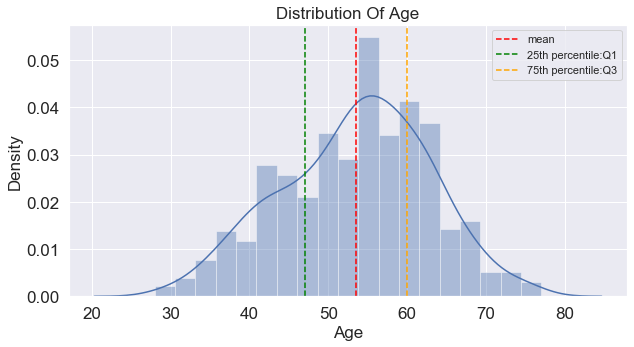

In [20]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['age'])
plt.title('Distribution Of Age', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['age']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['age'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['age'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Age', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The age is normally distributed, with a mean of around 55 years. It is clear that people around this age are the ones who usually suffer from heart diseases.

### b. Visualize the distribution of the resting blood pressure

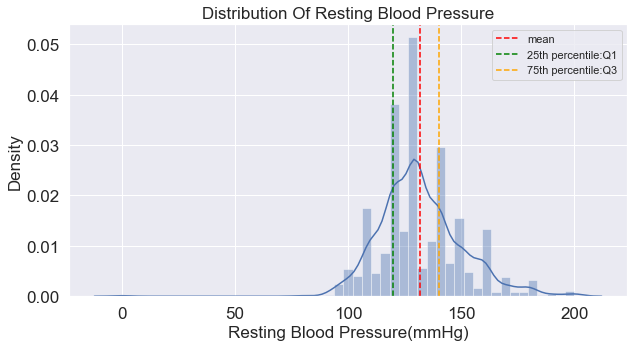

In [21]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['trestbps'])
plt.title('Distribution Of Resting Blood Pressure', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['trestbps']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['trestbps'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['trestbps'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Resting Blood Pressure(mmHg)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data seems to be skewed at the left. The mean is around 150mmHg and that is the resting blood pressure of most patients. No patients have a blood pressure ranging from 0-80 and this is what the data skewed to the right. 

### c. Visualize the distribution of Serum Cholesterol of patients

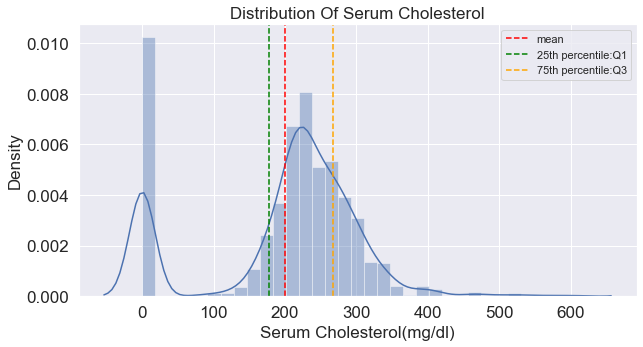

In [22]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['chol'])
plt.title('Distribution Of Serum Cholesterol', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['chol']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['chol'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['chol'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Serum Cholesterol(mg/dl)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is not normally distributed, and it is skewed to the right. The mean cholesterol is at around 193 mg/dl. 

### d. Visualize the distribution of the maximum heart rate achieved. 

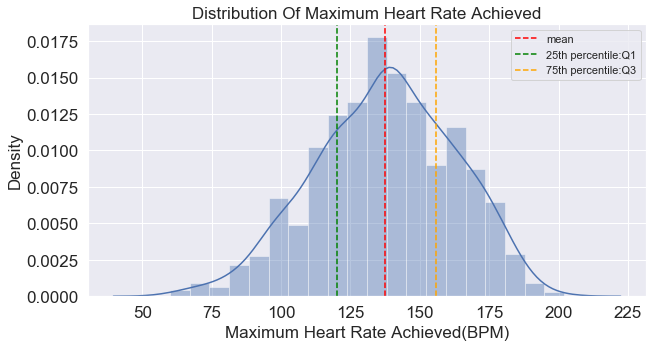

In [23]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['thalch'])
plt.title('Distribution Of Maximum Heart Rate Achieved', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['thalch']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['thalch'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['thalch'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Maximum Heart Rate Achieved(BPM)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is normally distributed with mean lying at around 135 Beats Per Minute(BPM). 

### e. Visualize the distribution of the ST depression

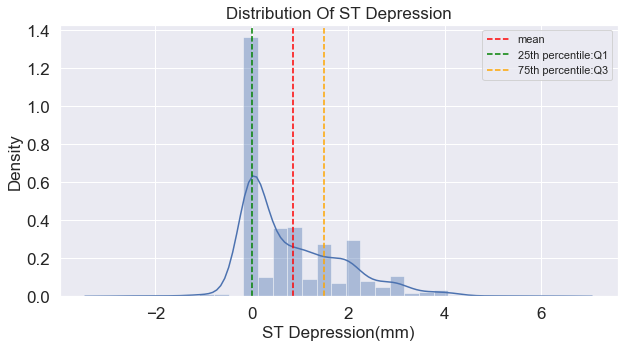

In [24]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['oldpeak'])
plt.title('Distribution Of ST Depression', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['oldpeak']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['oldpeak'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['oldpeak'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('ST Depression(mm)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is skewed to the right with an ST depression mean of about 1mm. Most patients however, have an ST depression of 0mm. 

### f. Visualize the number of Male patients and Female Patients

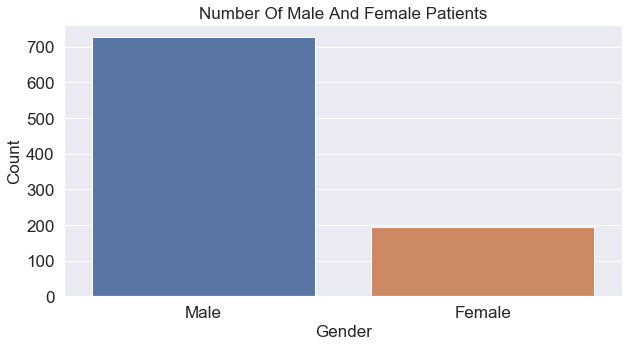

In [25]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['sex'])
plt.title('Number Of Male And Female Patients', fontsize=17)
plt.xlabel('Gender', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Male patients are more as they are over 700 compared to Female Patients which are just 200. 

### g. Visualize the chest pain that is most common.

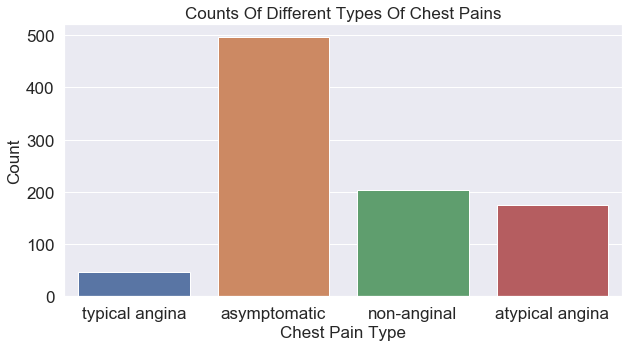

In [26]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['cp'])
plt.title('Counts Of Different Types Of Chest Pains', fontsize=17)
plt.xlabel('Chest Pain Type', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Asymptomatic Chest Pain is more common as it has 500 cases while typical angina Chest Pain is less common as it has about 30 cases. 

### h. Visualize the resting electrocardiographic results

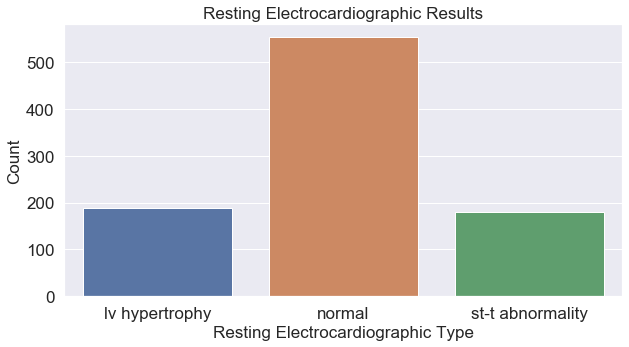

In [27]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['restecg'])
plt.title('Resting Electrocardiographic Results', fontsize=17)
plt.xlabel('Resting Electrocardiographic Type', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It seems like the Normal Resting Electrocardiographic is more common as it has over 500 results. Patients with an Iv Hypertrophy Resting Electrocardiographic are similar to those with a ST-T Abnormality Resting Electrocardiographic as both categories are around 290.

### i. Discover the number of patients that suffer from exercise-induced angina vs those who don't.

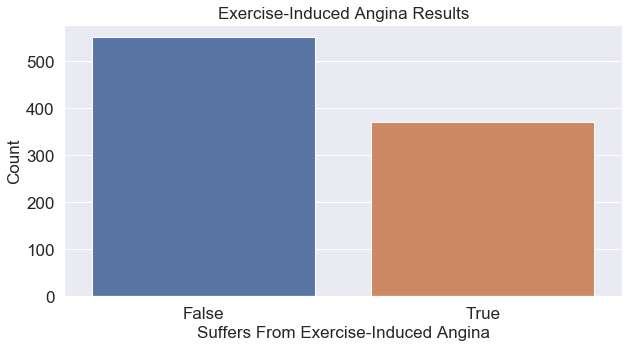

In [28]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['exang'])
plt.title('Exercise-Induced Angina Results', fontsize=17)
plt.xlabel('Suffers From Exercise-Induced Angina', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients do not suffer from exercise induced angina with over 500 reporting False and about 350 reporting True.

### j. Visualize the number of vessels colored by fluoroscopy

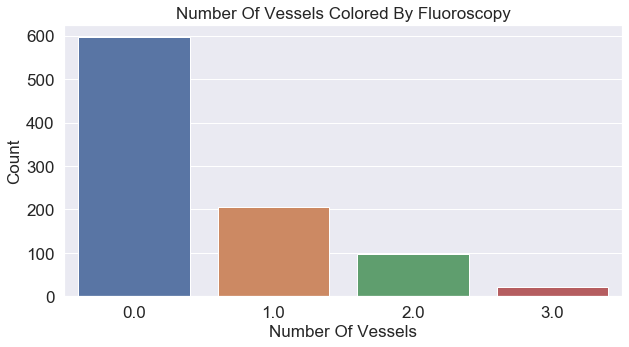

In [29]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['ca'])
plt.title('Number Of Vessels Colored By Fluoroscopy', fontsize=17)
plt.xlabel('Number Of Vessels', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients have 0 vessels colored by Fluoroscopy as 600 were recorded. Very few patients have only 3 vessels colored by fluoroscopy, as about 20 were recorded.

### k. Visualize the defects of the heart in patients

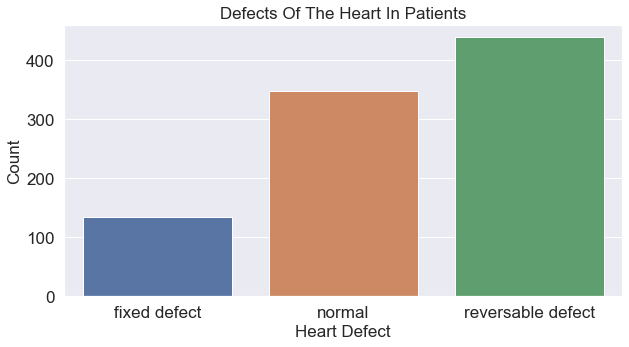

In [30]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['thal'])
plt.title('Defects Of The Heart In Patients', fontsize=17)
plt.xlabel('Heart Defect', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients have a reversible heart defect with over 400 being recorded. Over 300 patients have a normal heart. Only over 100 patients have a heart defect that is fixed.

## Bi-variate Analysis

### a. Visualize the relationship between age and sex

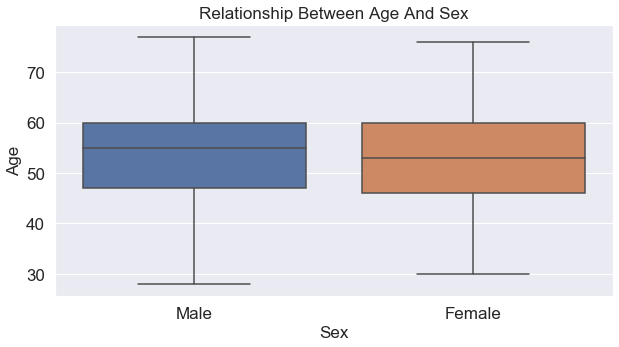

In [31]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.boxplot(data=uci_heart_data, x=uci_heart_data['sex'], y=uci_heart_data['age'])
plt.title('Relationship Between Age And Sex', fontsize=17)
plt.xlabel('Sex', fontsize=17)
plt.ylabel('Age', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### The median age for males is around 57 years, while the median age for women is around 53 years. Based on the size of the boxes, it seems like both male and female have the same variability in Age. 

### b. Visualize the relationship between sex and Chest Pain.

In [32]:
grouped_sex_cp = uci_heart_data.groupby(['sex', 'cp']).count()

In [33]:
grouped_sex_cp.drop(columns=grouped_sex_cp.iloc[:, 1:], inplace=True)

In [34]:
grouped_sex_cp.rename(columns={'id':'total'}, inplace=True)

In [35]:
grouped_sex_cp.reset_index(inplace=True)

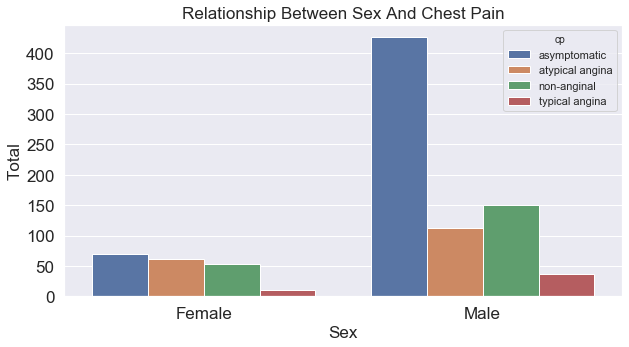

In [36]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=grouped_sex_cp, x='sex', y='total', hue='cp')
plt.title('Relationship Between Sex And Chest Pain', fontsize=17)
plt.xlabel('Sex', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most males seem to be suffering from asymptomatic angina with over 400 being recorded. 150 have been recorded as not being anginal. Most chest pains are recorded among males. This is seen with the ratio of male:female in all the chest pain types, i.e. approximately 520:70 for asymptomatic angina, 120:70 for atypical anginal, 150:50 for non-anginal chest pain and 35:10 for typical angina.

### c. Visualize the relationship between chest pain and age

In [37]:
age_bins = [0, 23, 35, 55, 65, 75, 85, 95, 100]
uci_heart_data["age_groups"] = pd.cut(uci_heart_data["age"], age_bins)

In [38]:
uci_heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_groups
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.000000,False,2.3,downsloping,0.0,fixed defect,0,"(55, 65]"
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.000000,True,1.5,flat,3.0,normal,2,"(65, 75]"
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.000000,True,2.6,flat,2.0,reversable defect,1,"(65, 75]"
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.000000,False,3.5,downsloping,0.0,normal,0,"(35, 55]"
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.000000,False,1.4,upsloping,0.0,normal,0,"(35, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.000000,False,0.0,flat,0.0,normal,1,"(35, 55]"
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,137.545665,False,0.5,flat,0.0,normal,0,"(55, 65]"
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.000000,False,0.0,flat,0.0,fixed defect,2,"(35, 55]"
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,137.545665,False,0.5,flat,0.0,fixed defect,0,"(55, 65]"


In [39]:
grouped_age_cp = uci_heart_data.groupby(['cp', 'age_groups']).count() 
grouped_age_cp.drop(columns=grouped_age_cp.iloc[:, 1:], inplace=True)
grouped_age_cp.rename(columns={'id':'total'}, inplace=True)
grouped_age_cp.reset_index(inplace=True)

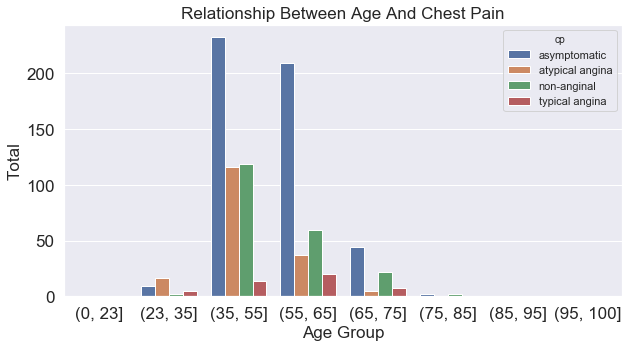

In [40]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=grouped_age_cp, x='age_groups', y='total', hue='cp')
plt.title('Relationship Between Age And Chest Pain', fontsize=17)
plt.xlabel('Age Group', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It can be seen that people in the age group 35-55 are the ones who usually suffer from chest pains. Asymptomatic Angina is common among them. The age group that follows with the most number of chest pains is the 55-65 age group. Asymptomatic Angina is the one that is common among them as well. For these 2 age groups however, the second largest recordings are non-anginal chest pains. The young age group, i.e. 0-23 do not suffer from chest pain at all, while the 23-35 age group has very few people who suffer from chest pain. From 65 years onwards, the number of people who suffer from chest pain seems to decrease tremendously. 

#### Examine the results on a lineplot

In [41]:
uci_age_grouped = uci_heart_data.groupby(['age', 'cp']).count()
uci_age_grouped.drop(columns=uci_age_grouped.iloc[:, 1:], inplace=True)
uci_age_grouped.rename(columns={'id':'total'}, inplace=True)
uci_age_grouped.reset_index(inplace=True)

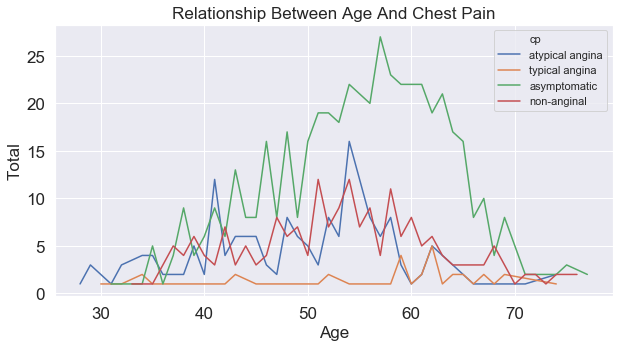

In [42]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.lineplot(data=uci_age_grouped, x='age', y='total', hue='cp')
plt.title('Relationship Between Age And Chest Pain', fontsize=17)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It shows that people with the highest number of chest pains are around the age of 55, and asymptomatic angina is the one that is common among all ages.

### d. Figure out the relationship between Resting Blood Pressure and age

In [43]:
rest_pres_bins = [80, 120, 160, 200]
uci_heart_data['rest_pressure_bins'] = pd.cut(uci_heart_data['trestbps'], bins=rest_pres_bins)

In [45]:
rest_pressure_grouped = uci_heart_data.groupby(['rest_pressure_bins', 'age_groups']).count()

In [46]:
rest_pressure_grouped.drop(columns=rest_pressure_grouped.iloc[:, 1:], inplace=True)
rest_pressure_grouped.rename(columns={'id':'total'}, inplace=True)
rest_pressure_grouped.reset_index(inplace=True)

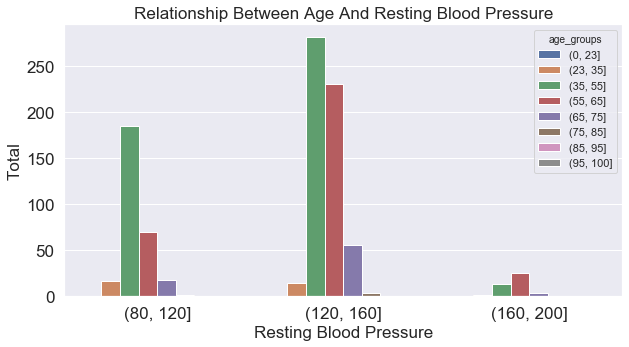

In [47]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=rest_pressure_grouped, x='rest_pressure_bins', y='total', hue='age_groups')
plt.title('Relationship Between Age And Resting Blood Pressure', fontsize=17)
plt.xlabel('Resting Blood Pressure', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most people have a resting blood pressure which is between 120-160mmHg and they are in the 35-55 age group. The 55-65 age group also has this resting blood pressure in common.

### e. Figure out the relationship between serum cholesterol and sex

In [48]:
bins = [100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620]
uci_heart_data['bin_cholesterol'] = pd.cut(uci_heart_data['chol'], bins=bins) 

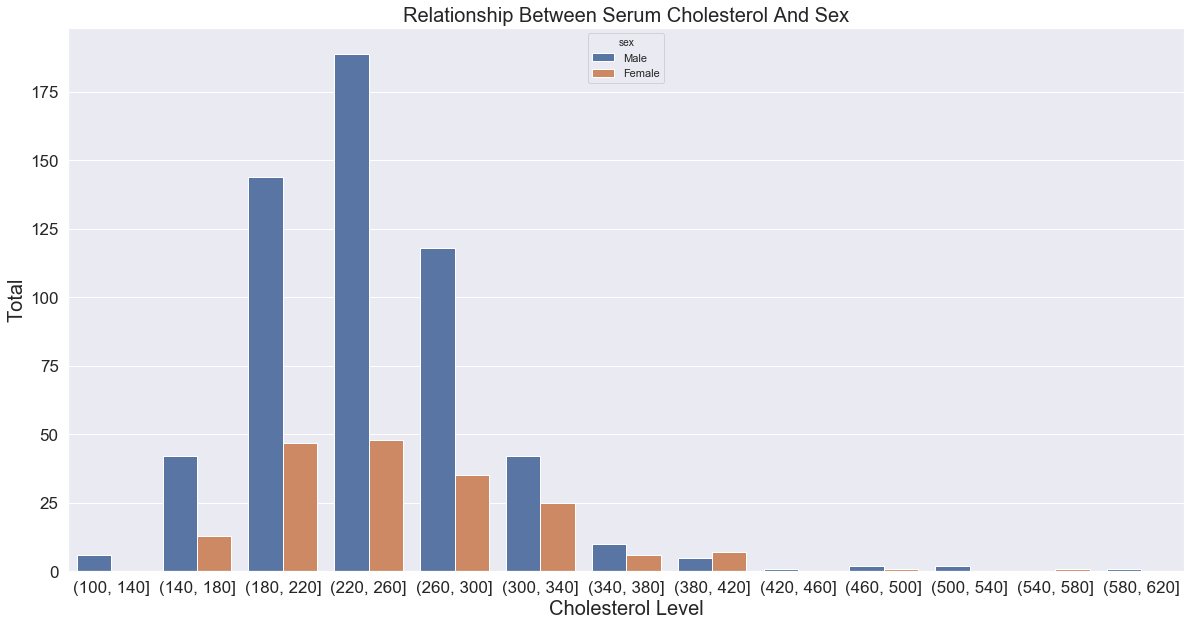

In [49]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.countplot(data=uci_heart_data, x='bin_cholesterol', hue='sex')
plt.title('Relationship Between Serum Cholesterol And Sex', fontsize=20)
plt.xlabel('Cholesterol Level', fontsize=20)
plt.ylabel('Total', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Both genders have a high number of people that have a cholesterol level which is between 220-260 with the Male gender having more people(i.e. above 175) compared to the Female gender(i.e. ~50).

### f. Figure out the relationship between serum cholesterol and age

In [50]:
chole_age = uci_heart_data.groupby(['bin_cholesterol', 'age_groups']).count()

In [51]:
chole_age.drop(columns=chole_age.iloc[:, 1:], inplace=True)
chole_age.rename(columns={'id':'total'}, inplace=True)
chole_age.reset_index(inplace=True)

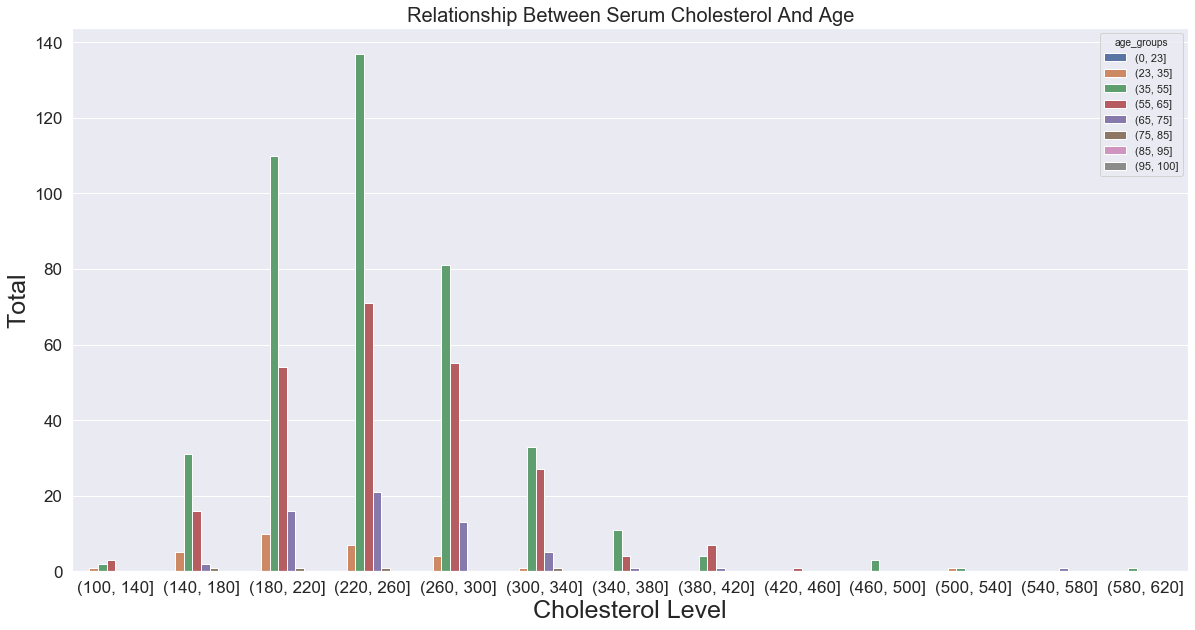

In [52]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=chole_age, x='bin_cholesterol', y='total', hue='age_groups')
plt.title('Relationship Between Serum Cholesterol And Age', fontsize=20)
plt.xlabel('Cholesterol Level', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People aged between 35-55 consume much of the portion among the different cholesterol levels with the highest number being recorded on the 220-260 cholesterol level category.

### g. Figure out the relationship between cholesterol and chest pain

In [53]:
chole_chest_pain = uci_heart_data.groupby(['bin_cholesterol', 'cp']).count()

In [54]:
chole_chest_pain.drop(columns=chole_chest_pain.iloc[:, 1:], inplace=True)
chole_chest_pain.rename(columns={'id':'total'}, inplace=True)
chole_chest_pain.reset_index(inplace=True)

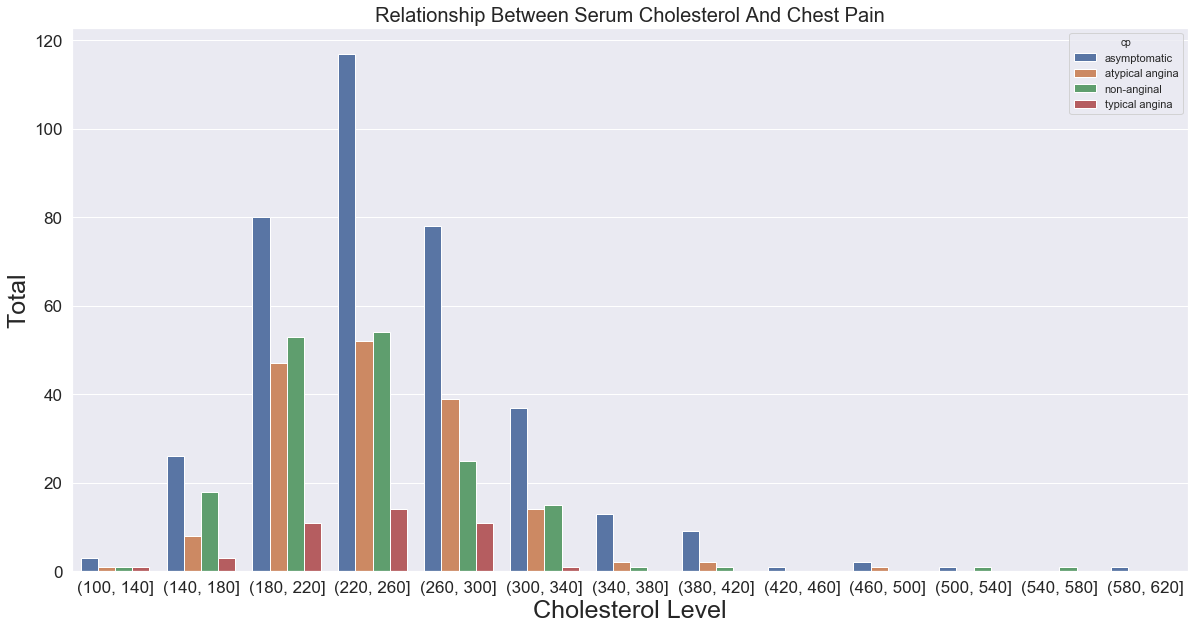

In [55]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=chole_chest_pain, x='bin_cholesterol', y='total', hue='cp')
plt.title('Relationship Between Serum Cholesterol And Chest Pain', fontsize=20)
plt.xlabel('Cholesterol Level', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People with a cholesterol level between 220-260mg/dl experience the most chest pains with asymptomatic angina being the common cause. 

### h. Figure out the relationship between Fasting blood sugar and chest pain

In [56]:
fast_blood_chest_pain = uci_heart_data.groupby(['fbs', 'cp']).count()
fast_blood_chest_pain.drop(columns=fast_blood_chest_pain.iloc[:, 1:], inplace=True)
fast_blood_chest_pain.rename(columns={'id':'total'}, inplace=True)
fast_blood_chest_pain.reset_index(inplace=True)

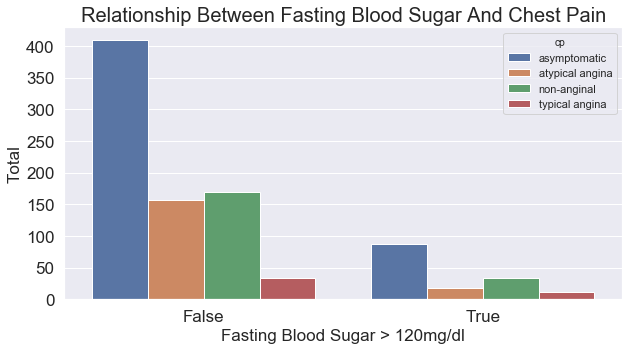

In [57]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=fast_blood_chest_pain, x='fbs', y='total', hue='cp')
plt.title('Relationship Between Fasting Blood Sugar And Chest Pain', fontsize=20)
plt.xlabel('Fasting Blood Sugar > 120mg/dl', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People with a fasting blood sugar level that is > 120mg/dl have fewer cases of chest pains compared to those with a lower fasting blood sugar level. 

### i. Figure Out The Relationship Bewteen Resting Electrocardiographic Results And Chest Pain

In [58]:
electro_chest_pain = uci_heart_data.groupby(['restecg', 'cp']).count()
electro_chest_pain.drop(columns=electro_chest_pain.iloc[:, 1:], inplace=True)
electro_chest_pain.rename(columns={'id':'total'}, inplace=True)
electro_chest_pain.reset_index(inplace=True)

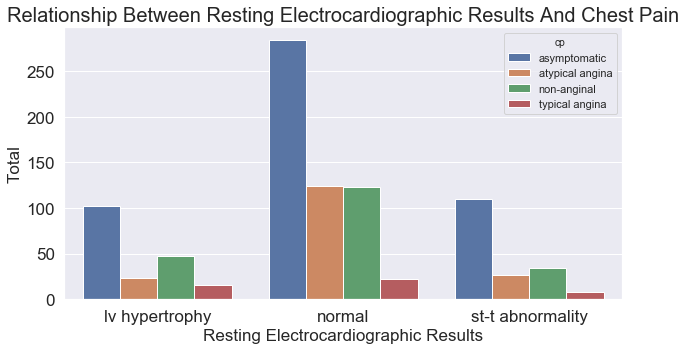

In [59]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=electro_chest_pain, x='restecg', y='total', hue='cp')
plt.title('Relationship Between Resting Electrocardiographic Results And Chest Pain', fontsize=20)
plt.xlabel('Resting Electrocardiographic Results', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People with a normal resting electrocardiographic result have more cases of chest pains caused by asymptomatic angina.

### j. Figure out the relationship between maximum heart rate achieved and chest pain

In [60]:
uci_heart_data['binned_heart_rate'] = pd.cut(uci_heart_data['thalch'], bins=5) 
heartR_chest_pain = uci_heart_data.groupby(['binned_heart_rate', 'cp']).count()
heartR_chest_pain.drop(columns=heartR_chest_pain.iloc[:, 1:], inplace=True)
heartR_chest_pain.rename(columns={'id':'total'}, inplace=True)
heartR_chest_pain.reset_index(inplace=True)

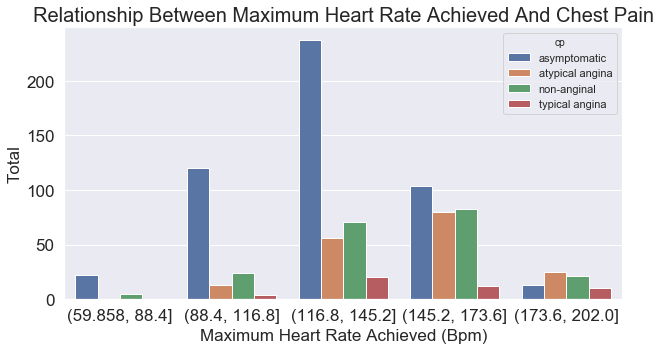

In [61]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=heartR_chest_pain, x='binned_heart_rate', y='total', hue='cp')
plt.title('Relationship Between Maximum Heart Rate Achieved And Chest Pain', fontsize=20)
plt.xlabel('Maximum Heart Rate Achieved (Bpm)', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most people with a heart rate of between 116.8-145.2 Bpm suffer from chest pain caused by asymptomatic angina.

### k. Figure out the relationship between Maximum Heart Rate Achieved and age

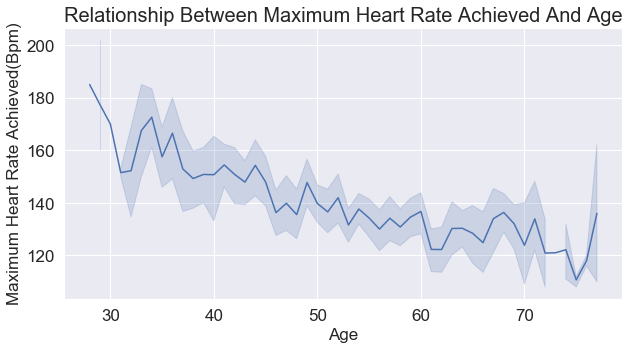

In [62]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.lineplot(data=uci_heart_data, x='age', y='thalch')
plt.title('Relationship Between Maximum Heart Rate Achieved And Age', fontsize=20)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Maximum Heart Rate Achieved(Bpm)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### The number of beats per minute declines as the person gets older.

### l. Find the relationship between the number of vessels colored by fluoroscopy and chest pain. 

In [63]:
vessels_chest_pain = uci_heart_data.groupby(['ca', 'cp']).count()
vessels_chest_pain.drop(columns=vessels_chest_pain.iloc[:, 1:], inplace=True)
vessels_chest_pain.rename(columns={'id':'total'}, inplace=True)
vessels_chest_pain.reset_index(inplace=True)

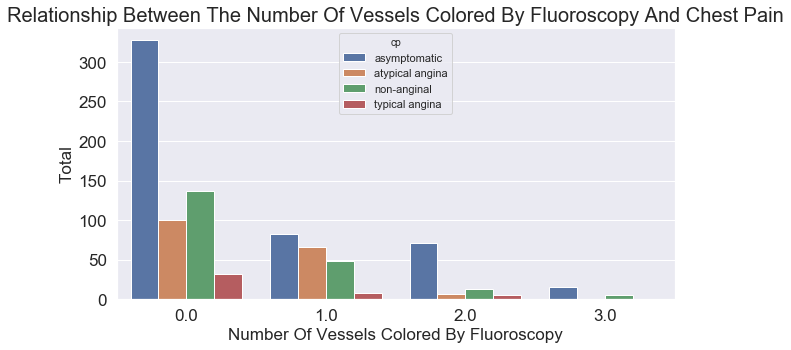

In [64]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=vessels_chest_pain, x='ca', y='total', hue='cp')
plt.title('Relationship Between The Number Of Vessels Colored By Fluoroscopy And Chest Pain', fontsize=20)
plt.xlabel('Number Of Vessels Colored By Fluoroscopy', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People with 0 vessels colored by fluoroscopy have the most cases of chest pains, and the main cause is asymptomatic angina.

### m. Discover the relationship between heart defects and sex

In [65]:
heart_defect_sex = uci_heart_data.groupby(['thal', 'sex']).count()
heart_defect_sex.drop(columns=heart_defect_sex.iloc[:, 1:], inplace=True)
heart_defect_sex.rename(columns={'id':'total'}, inplace=True)
heart_defect_sex.reset_index(inplace=True)

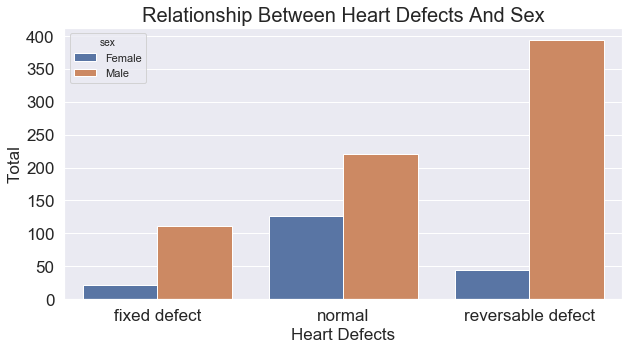

In [66]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=heart_defect_sex, x='thal', y='total', hue='sex')
plt.title('Relationship Between Heart Defects And Sex', fontsize=20)
plt.xlabel('Heart Defects', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most males have reversible defects compared to females. A very few number of both male and females have a fixed defect.

### n. Figure Out The Relationship Between Number Of Major Vessels Colored By Fluoroscopy And Heart Defects.

In [67]:
heart_defect_vessels = uci_heart_data.groupby(['ca', 'thal']).count()
heart_defect_vessels.drop(columns=heart_defect_vessels.iloc[:, 1:], inplace=True)
heart_defect_vessels.rename(columns={'id':'total'}, inplace=True)
heart_defect_vessels.reset_index(inplace=True)

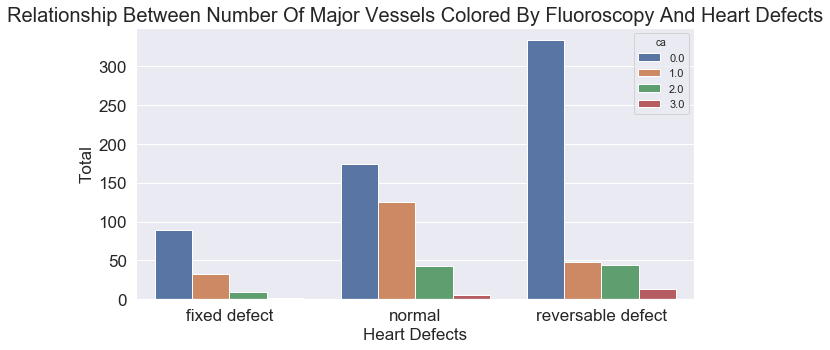

In [68]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=heart_defect_vessels, x='thal', y='total', hue='ca')
plt.title('Relationship Between Number Of Major Vessels Colored By Fluoroscopy And Heart Defects', fontsize=20)
plt.xlabel('Heart Defects', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People with 0 vessels colored by fluoroscopy have the largest group in all 3 categories, (a fixed heart defect, a normal heart and a reversible heart defect). 

## Correlation

### Check The Correlation Between The Variables In The Dataset.

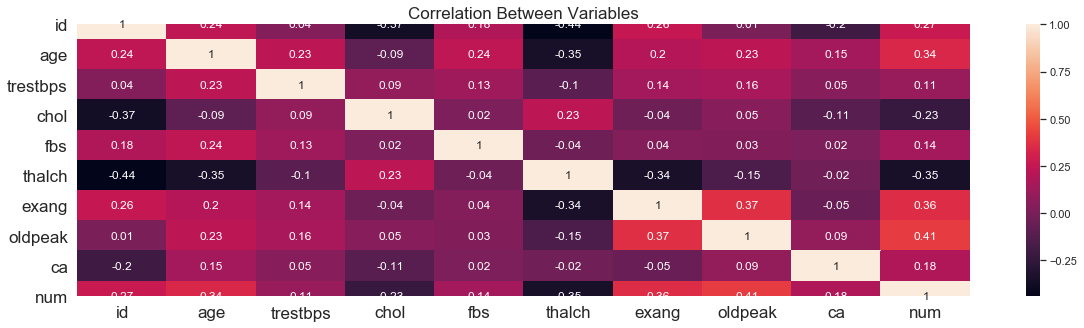

In [69]:
plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
sns.heatmap(np.round(uci_heart_data.corr(), 2), annot=True)
plt.title('Correlation Between Variables', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()